In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("stopwords")
nltk.download("vader_lexicon")

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\sentiment140.csv", encoding="ISO-8859-1", header=None)

# Assign column names
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Keep only relevant columns
df = df[["sentiment", "text"]]

# Map sentiment values (0 → Negative, 2 → Neutral, 4 → Positive)
df["sentiment"] = df["sentiment"].map({0: "negative", 2: "neutral", 4: "positive"})
df.head()

,sentiment,text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# function for data cleaning
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  #remove URLS
    text = re.sub(r'\@\w+|\#', '', text) # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    text = text.lower()  
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)
df.head()

,sentiment,text,clean_text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,negative,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,negative,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,negative,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,negative,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [ ]:
# Apply VADER sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df["vader_sentiment"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["vader_label"] = df["vader_sentiment"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")

df[["clean_text", "sentiment", "vader_label"]].head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,sentiment,vader_label
0,thats bummer shoulda got david carr third day,negative,negative
1,upset cant update facebook texting might cry r...,negative,negative
2,dived many times ball managed save 50 rest go ...,negative,positive
3,whole body feels itchy like fire,negative,negative
4,behaving im mad cant see,negative,negative
5,whole crew,negative,neutral
6,need hug,negative,positive
7,hey long time see yes rains bit bit lol im fin...,negative,positive
8,nope didnt,negative,neutral
9,que muera,negative,neutral


In [8]:

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)

print(df["sentiment"].value_counts())

sentiment
Positive    760423
Neutral     451671
Negative    387906
Name: count, dtype: int64


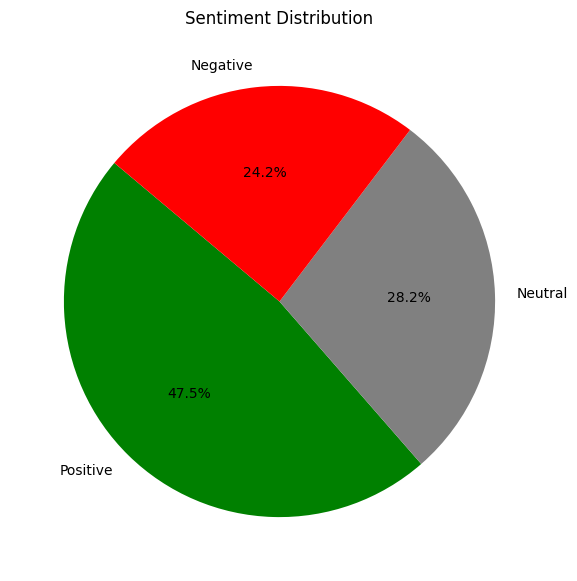

In [9]:
import matplotlib.pyplot as plt
sentiment_counts = df["sentiment"].value_counts()

colors = {"Positive": "green", "Neutral": "gray", "Negative": "red"}

plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    colors=[colors[label] for label in sentiment_counts.index],
    startangle=140
)
plt.title("Sentiment Distribution")
plt.show()

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

def chatbot_response(user_input):
    sentiment_score = sia.polarity_scores(user_input)["compound"]
    
    if sentiment_score >= 0.05:
        return "😊 I'm glad to hear that! How can I assist you further?"
    elif sentiment_score <= -0.05:
        return "😢 I'm sorry to hear that. Let me know how I can help."
    else:
        return "😐 I see. Could you provide more details?"

print("🤖 Chatbot: Hi! How can I help you today? (Type 'exit' to stop)")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("🤖 Chatbot: Goodbye! Have a great day! 😊")
        break
    response = chatbot_response(user_input)
    print(f"🤖 Chatbot: {response}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


🤖 Chatbot: Hi! How can I help you today? (Type 'exit' to stop)


🤖 Chatbot: 😢 I'm sorry to hear that. Let me know how I can help.
🤖 Chatbot: Goodbye! Have a great day! 😊
